# Exponential growth

## Data generation with given parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import linalg

#############################
## Definition of variables ##
#############################
r = 0.6    # Rate of growth
params = (r,)

x0 = np.array([0.5])     # Initial population
t0 = 0     # Time evaluation starting point
tf = 15    # Time evaluation finishing point

# Generate time evaluation points to show
num_tpoints = 50
t_points = np.linspace(t0, tf, num_tpoints)

############################################
## Differential equation and its solution ##
############################################
def exp_equation(t, x, *args):
    r = args[0]
    return r * x

# Solution of equation
sol_exp = integrate.solve_ivp(exp_equation, (t0,tf), x0, args=params, t_eval=t_points)

# Display
print(sol_exp.message)
plt.plot(t_points, sol_exp.y[0], '-r', label='x0')
plt.grid()
plt.legend(loc='best')
plt.ylabel('population')
plt.xlabel('time')
plt.show()

The solver successfully reached the end of the integration interval.


<Figure size 640x480 with 1 Axes>

## Gaussian noise addition

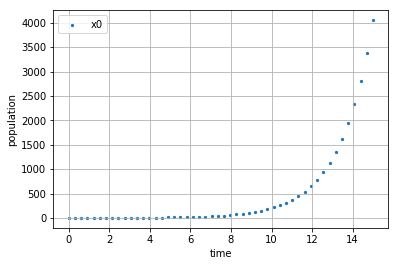

In [2]:
var = 0.4
noisy_data_exp = sol_exp.y + (var * np.random.randn(np.shape(sol_exp.y)[0]))

plt.scatter(t_points, noisy_data_exp[0], s=5 ,label='x0')
plt.grid()
plt.legend(loc='best')
plt.ylabel('population')
plt.xlabel('time')
plt.show()

In [3]:
noisy_data_exp[0].shape

(50,)

In [4]:
sol_exp.y[0].shape

(50,)

## Parameter estimation

We first do...

### Trajectory matching

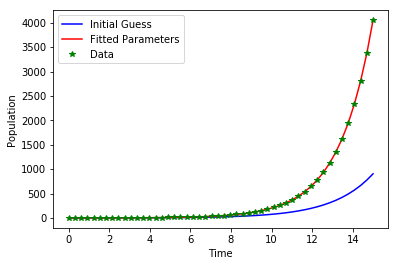

In [34]:
from scipy import optimize

def exp_residuals(params):
    sim_data = integrate.solve_ivp(exp_equation, (t0,tf), x0, args=params, t_eval=t_points)
    return sim_data.y[0] - noisy_data_exp[0]

initial_params = (0.5,)
fitted_params = optimize.least_squares(exp_residuals, initial_params, method='lm')

initial_guess = integrate.solve_ivp(exp_equation, (t0,tf), x0, args=initial_params, t_eval=t_points)
fitted_data = integrate.solve_ivp(exp_equation, (t0,tf), x0, args=fitted_params.x, t_eval=t_points)

plt.plot(t_points, initial_guess.y[0], 'b-', label='Initial Guess')
plt.plot(t_points, fitted_data.y[0], 'r-', label='Fitted Parameters')
plt.plot(t_points, noisy_data_exp[0], 'g*', label='Data')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Population')
plt.show()

In [18]:
exp_residuals((0.3,))

array([-4.49045966e-01, -5.01770163e-01, -5.70187470e-01, -6.57952732e-01,
       -7.69524541e-01, -9.10358675e-01, -1.08671318e+00, -1.30645928e+00,
       -1.57945985e+00, -1.91755439e+00, -2.33455908e+00, -2.84728357e+00,
       -3.47562066e+00, -4.24317186e+00, -5.18037085e+00, -6.32452826e+00,
       -7.71983148e+00, -9.41711260e+00, -1.14780974e+01, -1.39778267e+01,
       -1.70022454e+01, -2.06629531e+01, -2.50976838e+01, -3.04703054e+01,
       -3.69708203e+01, -4.48185532e+01, -5.42974468e+01, -6.57166987e+01,
       -7.94721406e+01, -9.60642361e+01, -1.16098020e+02, -1.40281782e+02,
       -1.69429367e+02, -2.04526649e+02, -2.46780967e+02, -2.97555513e+02,
       -3.58627152e+02, -4.32196204e+02, -5.20886442e+02, -6.27745094e+02,
       -7.56248328e+02, -9.10881598e+02, -1.09663165e+03, -1.31963873e+03,
       -1.58777303e+03, -1.91063413e+03, -2.29954752e+03, -2.76756874e+03,
       -3.32968896e+03, -4.00526971e+03])

### Gradient matching

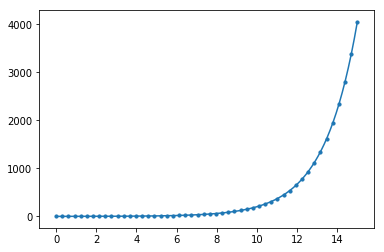

In [225]:
from scipy import interpolate
cs0 = interpolate.CubicSpline(t_points, sol_exp.y[0])
tnew = np.linspace(t0, tf, 500)

plt.plot(tnew,cs0(tnew), label='interpolated x0')
plt.scatter(t_points, noisy_data_exp[0], s=10, label='x0')
plt.show()

### Paramter cascading

# Logistic growth

## Data generation with given parameters

The solver successfully reached the end of the integration interval.


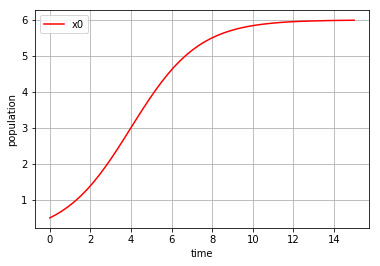

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import linalg

#############################
## Definition of variables ##
#############################
r = 0.6    # Rate of growth
a = 0.1
params = (r, a)

x0 = np.array([0.5])     # Initial population
t0 = 0     # Time evaluation starting point
tf = 15    # Time evaluation finishing point

# Generate time evaluation points to show
num_tpoints = 50
t_points = np.linspace(t0, tf, num_tpoints)

############################################
## Differential equation and its solution ##
############################################
def log_equation(t, x, *args):
    r = args[0]
    a = args[1]
    return x * (r - a*x)

# Solution of equation
sol_log = integrate.solve_ivp(log_equation, (t0,tf), x0, args=params, t_eval=t_points)

# Display
print(sol_exp.message)
plt.plot(t_points, sol_log.y[0], '-r', label='x0')
#plt.plot(sol.t, sol_exp.y[1], '-b', label='x1') 
plt.grid()
plt.legend(loc='best')
plt.ylabel('population')
plt.xlabel('time')
plt.show()

## Gaussian noise addition

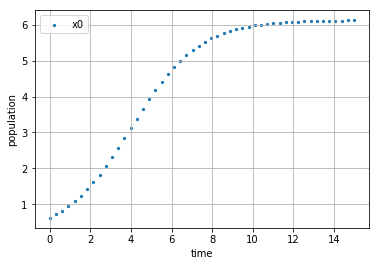

In [42]:
var = 0.4
noisy_data_log = sol_log.y + (var * np.random.randn(np.shape(sol_log.y)[0]))

plt.scatter(t_points, noisy_data_log, s=5, label='x0')
plt.grid()
plt.legend(loc='best')
plt.ylabel('population')
plt.xlabel('time')
plt.show()

In [40]:
noisy_data_log.shape

(1, 50)

## Parameter estimation

We first do...

### Trajectory matching

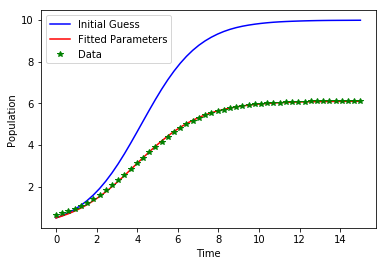

In [50]:
from scipy import optimize

def exp_residuals(params):
    sim_data = integrate.solve_ivp(log_equation, (t0,tf), x0, args=params, t_eval=t_points)
    return sim_data.y[0] - noisy_data_log[0]

initial_params = (0.7, 0.07)
fitted_params = optimize.least_squares(exp_residuals, initial_params, method='lm')

initial_guess = integrate.solve_ivp(log_equation, (t0,tf), x0, args=initial_params, t_eval=t_points)
fitted_data = integrate.solve_ivp(log_equation, (t0,tf), x0, args=fitted_params.x, t_eval=t_points)

plt.plot(t_points, initial_guess.y[0], 'b-', label='Initial Guess')
plt.plot(t_points, fitted_data.y[0], 'r-', label='Fitted Parameters')
plt.plot(t_points, noisy_data_log[0], 'g*', label='Data')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Population')
plt.show()

### Gradient matching

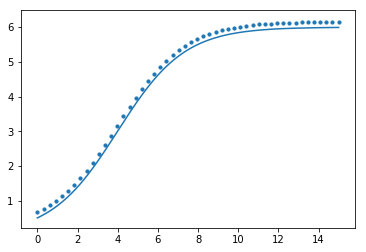

In [220]:
from scipy import interpolate
cs0 = interpolate.CubicSpline(t_points, sol_log.y[0])
tnew = np.linspace(t0, tf, 500)

plt.plot(tnew,cs0(tnew), label='interpolated x0')
plt.scatter(t_points, noisy_data_log[0], s=10, label='x0')
plt.show()

### Paramter cascading

# Lotka-Volterra

## Data generation with given parameters

The solver successfully reached the end of the integration interval.


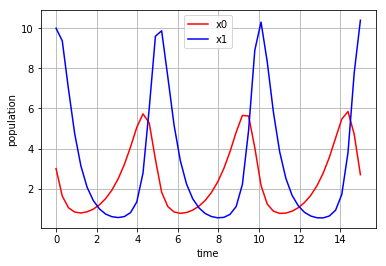

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import linalg

# Definition of variables
nesp = 2
#rmax = 100
#bmax = 1

#r = rmax * np.random.rand(nesp)                  #
#b = 2*bmax * np.random.rand(nesp,nesp) - bmax    #
#x0 = 19 * np.random.rand(nesp) + 1
r = np.array([1,-2])
b = np.array([[0,-0.3],[0.8,0]])
t0 = 0      # Time evaluation starting point
tf = 15    # Time evaluation finishing point
x0 = np.array([3,10])



# Generate time evaluation points to show
num_tpoints = 50
t_points = np.linspace(t0, tf, num_tpoints)

# Equation to solve
def lv_equation(t, x):
    return x * (r + b @ x)  # x_i = x_i (r_i + \sum b_ij x_j)

# Solution of equation
sol = integrate.solve_ivp(lv_equation, (t0,tf), x0, t_eval=t_points)

# Display
print(sol.message)
plt.plot(t_points, sol.y[0], '-r', label='x0')
plt.plot(t_points, sol.y[1], '-b', label='x1') 
plt.grid()
plt.legend(loc='best')
plt.ylabel('population')
plt.xlabel('time')
plt.show()

## Gaussian noise addition

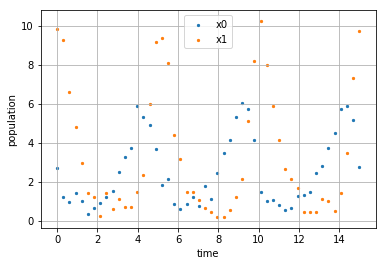

In [150]:
var = 0.4
noisy_data = sol.y + (var * np.random.randn(np.shape(sol.y)[0], np.shape(sol.y)[1]) )

plt.scatter(t_points, noisy_data[0], s=5, label='x0')
plt.scatter(t_points, noisy_data[1], s=5, label='x1') 
plt.grid()
plt.legend(loc='best')
plt.ylabel('population')
plt.xlabel('time')
plt.show()

## Parameter estimation

### Trajectory matching

### Gradient matching

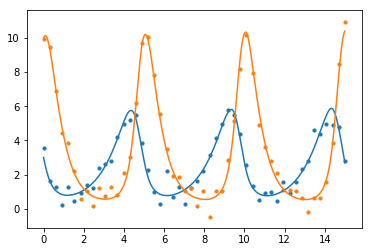

In [66]:
from scipy import interpolate
cs0 = interpolate.CubicSpline(t_points, sol.y[0])
cs1 = interpolate.CubicSpline(t_points, sol.y[1])
tnew = np.linspace(t0, tf, 500)

plt.plot(tnew,cs0(tnew), label='interpolated x0')
plt.plot(tnew,cs1(tnew), label='interpolated x1')
plt.scatter(t_points, noisy_data[0], s=10, label='x0')
plt.scatter(t_points, noisy_data[1], s=10, label='x1') 
plt.show()

### Parameter cascading

### Something else